# Exercise 5: Multilayer perceptron

The focus of this exercise will be on multilayer perceptron and to do that in a simpler way, an introduction to TensorFlow is given first.

## 5.1 Introduction to TensorFlow

TensorFlow is an open-source symbolic math software library used for machine learning applications such as neural networks. The following command is used to import TensorFlow in the Python code:

In [ ]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

### 5.1.1 Constants, sessions, and operations
TensorFlow is based around tensors - *n*-dimensional arrays of a given type. Three main tensor types in TensorFlow are constant, variable, and placeholder. To create a constant, the [tf.constant()](https://www.tensorflow.org/api_docs/python/tf/constant) method is used:

In [ ]:
c=tf.constant(2)
print(c)

This constant tensor like other tensors has a value, a shape, a data type, and a name. These can be directly specified:

In [ ]:
c=tf.constant(3, shape=(2, 5), dtype=tf.float32, name="our_constant")
print(c)

To evaluate a tensor, a [Session](https://www.tensorflow.org/api_docs/python/tf/Session) instance is required. Sessions are environments where tensors and operations are executed. A session can be created and then used for evaluation as follows:

In [ ]:
session=tf.Session()
print(session.run(c))

Other useful ways of creating constant tensors include the methods [tf.zeros()](https://www.tensorflow.org/api_docs/python/tf/zeros) and [tf.ones()](https://www.tensorflow.org/api_docs/python/tf/ones):

In [ ]:
z=tf.zeros((2, 3))
print(session.run(z))

o=tf.ones((3, 1))
print(session.run(o))

The most common methods to create tensors with random values are [tf.random_uniform](https://www.tensorflow.org/api_docs/python/tf/random_uniform) and [tf.random_normal](https://www.tensorflow.org/api_docs/python/tf/random_normal):

In [ ]:
u=tf.random_uniform(shape=(2, 4), minval=2, maxval=7)
print(session.run(u))

n=tf.random_normal(shape=(2, 4), mean=0, stddev=1)
print(session.run(n))

Applying addition, subtraction, multiplication, and division to tensors can be achieved by using operators +, -, *, and / or by calling  [tf.add()](https://www.tensorflow.org/api_docs/python/tf/add), [tf.subtract()](https://www.tensorflow.org/api_docs/python/tf/subtract), [tf.multiply()](https://www.tensorflow.org/api_docs/python/tf/multiply), [tf.divide()](https://www.tensorflow.org/api_docs/python/tf/divide). Each of these operations is performed element-wise, e.g. when applied to matrices, [tf.multiply()](https://www.tensorflow.org/api_docs/python/tf/multiply) is not matrix multiplication like [tf.matmul()](https://www.tensorflow.org/api_docs/python/tf/matmul), but element-wise multiplication.

In [ ]:
a=tf.ones((1, 2))
b=2*tf.ones((1, 2))

print(session.run(a+b+5))
print(session.run(tf.subtract(a, b)))
print(session.run(a*b))
print(session.run(tf.divide(a, b)))

Some other operations include [tf.abs()](https://www.tensorflow.org/api_docs/python/tf/abs), [tf.exp()](https://www.tensorflow.org/api_docs/python/tf/exp), [tf.matmul()](https://www.tensorflow.org/api_docs/python/tf/matmul), [tf.pow()](https://www.tensorflow.org/api_docs/python/tf/pow), [tf.square()](https://www.tensorflow.org/api_docs/python/tf/square), [tf.transpose()](https://www.tensorflow.org/api_docs/python/tf/transpose).

In [ ]:
print(session.run(tf.transpose(tf.abs(tf.random_normal((1, 5), mean=0, stddev=3)))))

### 5.1.2 Placeholders and variables
Tensors used for more complex data and computation are [placeholders](https://www.tensorflow.org/api_docs/python/tf/placeholder) and [variables](https://www.tensorflow.org/api_docs/python/tf/Variable). Placeholders are providers of future values and mostly serve to take the input to the network. For this reasong thay cannot be directly evaluated unless its value is "fed" i.e. given by means of dictionary.

In [ ]:
#we create a placeholder
a=tf.placeholder(dtype=tf.float32)

#this would produce an error
#print(session.run(a))

#but not this
print(session.run(a, feed_dict={a:-5}))

#we use its value later
b=tf.abs(a)

#to provide a value to the placeholder, feed_dict is used
print(session.run(b, feed_dict={a:-5}))
#we can also use different input size
print(session.run(b, feed_dict={a:[-17, 1, -2]}))

print("\n\n")

m1=tf.placeholder(dtype=tf.float32)
m2=tf.placeholder(dtype=tf.float32)

p=tf.matmul(m1, m2)
print(session.run(p, feed_dict={m1:[[1], [2], [3]], m2:[[1, 2, 3]]}))
print(session.run(p, feed_dict={m1:[[1, 2, 3]], m2:[[1], [2], [3]]}))


Variable are mostly used for trainable parameters. While constants are intialized when created,variables are initialized within the session by a procedure that must be defined. Manual assignment of new values tan be is possible using [tf.assign()](https://www.tensorflow.org/api_docs/python/tf/assign). Variables are mostly changed during the optimization process.


In [ ]:
session=tf.Session()
#a constant is used for the initialization procedure
a=tf.Variable(3)
#random values will be used for initialization
b=tf.Variable(tf.random_uniform(shape=(2, 3)))

#this would produce an error since the variable has not been initialized - only the initialization procedure has been defined
#print(session.run(a))

#initialize all variables
session.run(tf.global_variables_initializer())
#now evaluate the variable
print(session.run(a))
print(session.run(b))

### 5.1.3 Linear regression
To have an example of a fully written network, let's now implement simple multivariate linear regression using TensorFlow. The used model will be $y=\mathbf{w}^{T}\mathbf{x}+\mathbf{b}$.

In [ ]:
#data placeholders - this will be used for the given features and for the ground-truth value of y
x=tf.placeholder(dtype=tf.float32, shape=[None, 3])
y=tf.placeholder(dtype=tf.float32, shape=[None, 1])

#parameter variables
w=tf.Variable(tf.random_normal(shape=(3, 1)))
b=tf.Variable(tf.random_normal([1, 1]))

#the model for y - this will be used for the predicted value of y
y_predicted=tf.matmul(x, w)+b

TensorFlow trains a model i.e. learns its parameter values by minimizing a loss function that needs to be defined. The minimization is carried out by a defined optimizer object by calling its [minimize()](https://www.tensorflow.org/api_docs/python/tf/train/Optimizer#minimize) method called. The learning rate chosen when defining the optimizer objects and the number of training epochs will have a significant impact on the model training process by influencing how fast the learning process will converge.

In [ ]:
#the loss function will be mean square
loss=tf.reduce_mean(tf.square(y_predicted-y))

#gradient descent optimizer with learning rate 0.1
optimizer=tf.train.GradientDescentOptimizer(0.1)

#train operation
train=optimizer.minimize(loss)

#generation data for regression
import numpy as np
w_real=np.array([[1], [3], [-2]])
x_train=np.random.normal(size=(100, 3))
y_train=(w_real.T@x_train.T).T;

session.run(tf.global_variables_initializer())
for epoch in range(100):
    session.run(train, feed_dict={x:x_train, y:y_train})
    if ((epoch+1)%10==0):
        print("Epoch #"+str(epoch+1)+": "+str(session.run(loss, feed_dict={x:x_train, y:y_train})))

#print the trained weights
print(session.run(w))

## 5.2 The XOR problem
XOR samples are not linearly separable. However, they can be separated by introducing non-linearities. In TensorFlow some of them include [tf.sigmoid()](https://www.tensorflow.org/api_docs/python/tf/sigmoid), [tf.tanh()](https://www.tensorflow.org/api_docs/python/tf/tanh), [tf.nn.relu()](https://www.tensorflow.org/api_docs/python/tf/nn/relu), etc. Besides the common [tf.train.GradientDescentOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer), there are other optimizers as well, e.g. [tf.train.AdamOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer).

**Task**

Below is the code for solving the XOR problem in TensorFlow. Determine how many epochs are required for the training process to converge for each combination of the chosen activation function, optimizer, and various learning rates. Which combination turned out to be the best?

params and 5 runs:

    SIG, GRAD, 0.1 -> 2230, 2980, 3741, 4845, 3112 -> AVG 3381.6
    SIG, GRAD, 0.01-> fail, fail, fail, fail, fail -> fail
    SIG, GRAD, 0.5 -> 1168, 1017, 1612, 2051, 1525 -> AVG 1474.6

    SIG, ADAM, 0.1 -> 534, 230, 268, 4700, 369     -> AVG 1220.2
    SIG, ADAM, 0.01-> fail, 256, 733, 1836, fail   -> AVG for failed?
    SIG, ADAM, 0.5 -> fail, fail, fail, 116, fail  -> AVG for failed?

    TAN, GRAD, 0.1 -> 1681, 606, 1161, 855, 1079   -> AVG 1076.4
    TAN, GRAD, 0.01-> 9427, 4247, 7168, 7720, 8682 -> AVG 7448.8
    TAN, GRAD, 0.5 -> 281, 301, 324, 304, 308      -> AVG 303.6

    TAN, ADAM, 0.1 -> 117, 91, 103, 189, 75        -> AVG 115
    TAN, ADAM, 0.01-> 222, 845, 746, 687, 236      -> AVG 547.2
    TAN, ADAM, 0.5 -> 63, fail, fail, 96, 70       -> Small AVG but no convergence

    REL, GRAD, 0.1 -> fail, fail, fail, fail, fail -> FAIL
    REL, GRAD, 0.01-> fail, fail, fail, fail, fail -> FAIL
    REL, GRAD, 0.5 -> fail, fail, fail, fail, fail -> FAIL
    
    REL, ADAM, 0.1 -> fail, fail, fail, fail, fail -> FAIL
    REL, ADAM, 0.01-> fail, fail, fail, fail, fail -> FAIL
    REL, ADAM, 0.5 -> fail, fail, fail, fail, fail -> FAIL
    
    BEST OPTION was combination of TANH function, ADAM optimization and 0.5 learning rate.
    WORST OPTION: ReLU wasn't able to find solution.

In [ ]:
#activation_type=tf.nn.sigmoid;
#activation_type=tf.nn.tanh;
activation_type=tf.nn.relu;

#optimizer_type=tf.train.GradientDescentOptimizer
optimizer_type=tf.train.AdamOptimizer

learning_rate=0.5;


threshold=1e-4

session=tf.Session()

#training data
x_train=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train=np.array([[0], [1], [1], [0]])

x=tf.placeholder(tf.float32, [None, 2])
y=tf.placeholder(tf.float32, [None, 1])

w1=tf.Variable(tf.random_uniform((2, 2)))
b1=tf.Variable(tf.random_uniform([2]))

w2=tf.Variable(tf.random_uniform((2, 1)))
b2=tf.Variable(tf.random_uniform([1]))


f1=tf.matmul(x, w1)+b1
f2=activation_type(f1)
y_predicted=tf.matmul(f2, w2)+b2

loss=tf.reduce_mean(tf.square(y_predicted-y))

optimizer=optimizer_type(learning_rate)
train=optimizer.minimize(loss)

session.run(tf.global_variables_initializer())

for epoch in range(10000):
    session.run(train, feed_dict={x:x_train, y:y_train})
    error=session.run(loss,{x:x_train, y:y_train})
    if ((epoch+1)%100==0):
        print("Epoch #"+str(epoch+1)+": "+str(error))
    if (error<threshold):
        print("Threshold passed at epoch #"+str(epoch+1)+".");
        break;

session.close();

## 5.3 The MNIST dataset
[The MNIST dataset](http://yann.lecun.com/exdb/mnist/) contains 60,000 training and 10,000 test images of handwritten digits. It is used to test the ability of a method to recognize which digit is on a given image. Although spatial distribution of individual image pixels matters, in this example we are going to disregard it and simply use individual pixel values as features. There are $28\cdot 28=784$ pixels i.e. features per image. The basic code is given below.

**Task**

Experiment with different activation functions, learning rates, batch sizes, optimizers, and architectures. What is the best combination of them? Which of them has the highest impact on the accuracy and rate of convergence? How about the size of hidden layers? Make the comparisons and draw the appropriate plots.


ANS:


BEST combination was shown to be ADAM optimizer with sigmoid or relu function, GradiendDesc performed poorly for all activation functions. For big learning rate we have big jumps in accuracy during epochs, and for small lr we have smooth but slow increase in accuracy. Bigger hidden layers resulted in jumps in accuracy during learning but bigger final accuracy.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Relu, ADAM, 100


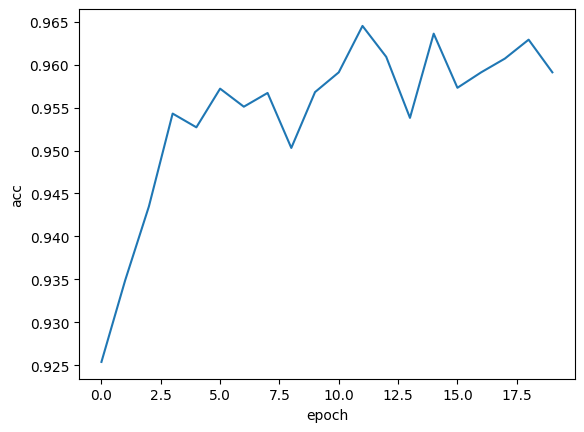

Sigmoid, ADAM, 100


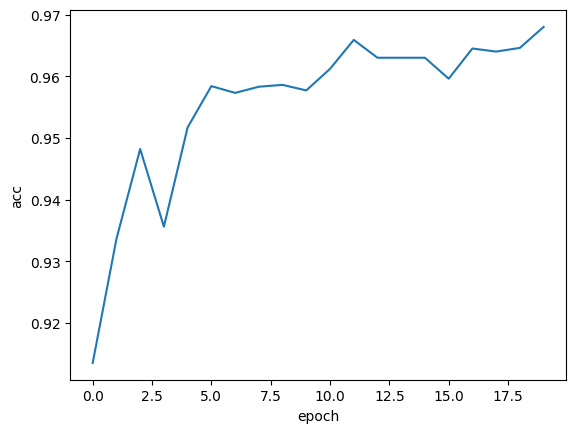

Tanh, ADAM, 100


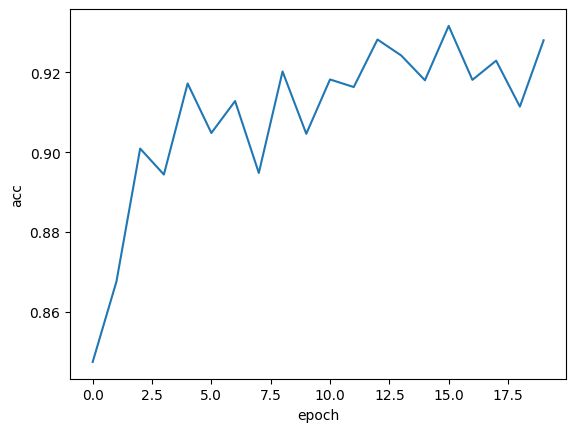

ReLU, GRAD, 100


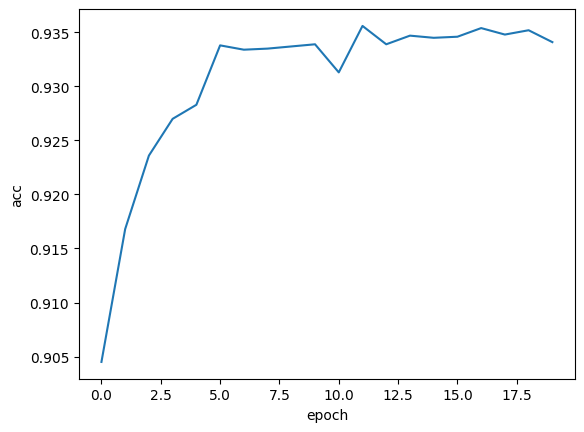

Sigmoid, GRAD, 100


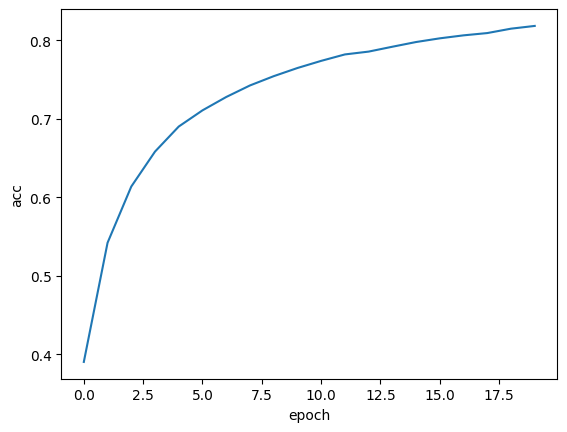

ReLU, GRAD, 10


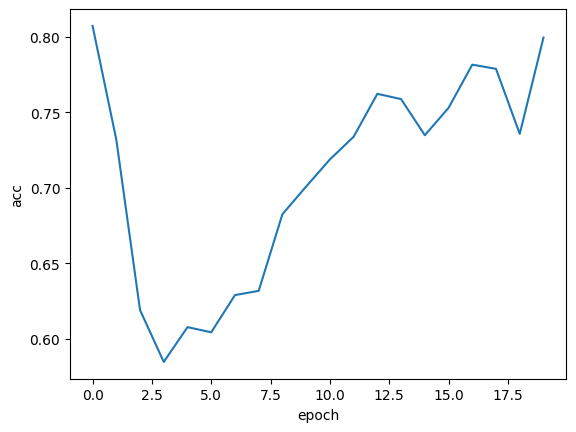

ReLU, GRAD, 500


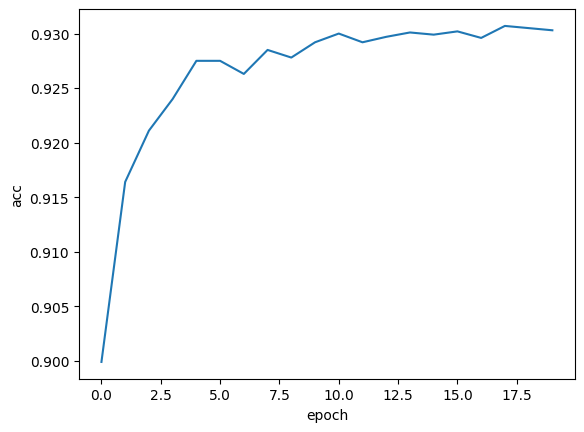

Sigmoid, ADAM, 100, 0.1


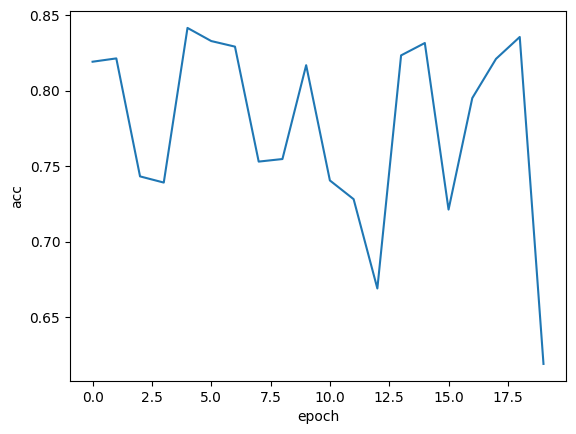

Sigmoid, ADAM, 100, 0.001


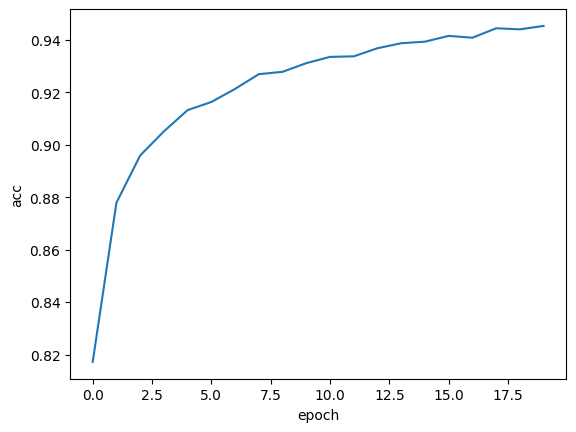

Sigmoid, ADAM, 100, 0.1


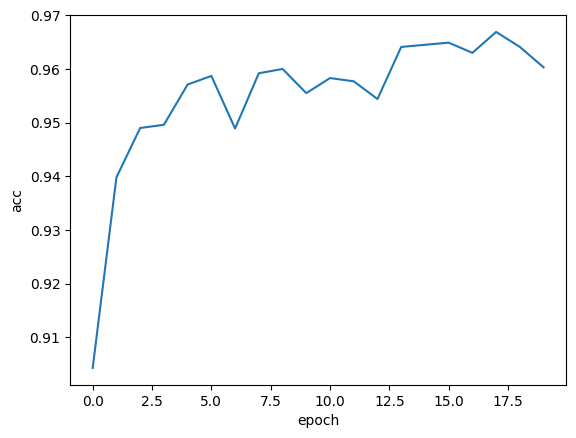

Sigmoid, ADAM, 100, 0.01, hidden layer (10, 10)


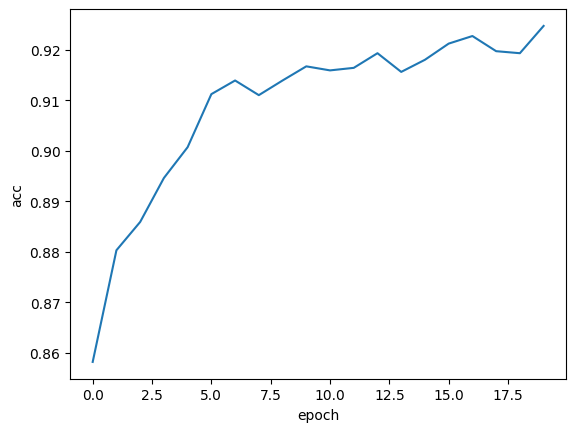

Sigmoid, ADAM, 100, 0.01, hidden layer (1024, 1024)


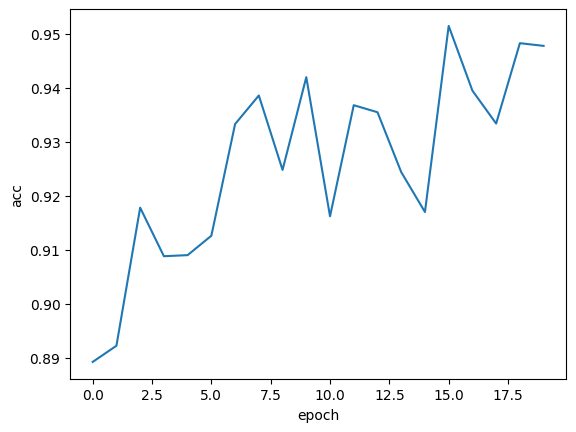

In [1]:
#use MNIST data
#from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

import input_data
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

#import tensorflow as tf

#settings
learning_rate=0.01
training_epochs_count=20
batch_size=100
batches_count=int(mnist.train.num_examples/batch_size)

activation_function=tf.nn.relu
optimizer_type=tf.train.AdamOptimizer

batch_size=100
display_step=1

#architecture
hidden_layer_size_1=256
hidden_layer_size_2=256
input_size=784
n_classes=10


#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))
acc_list = []

for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("Relu, ADAM, 100")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()





activation_function=tf.nn.sigmoid

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("Sigmoid, ADAM, 100")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()





activation_function=tf.nn.tanh

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("Tanh, ADAM, 100")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()


activation_function=tf.nn.relu
optimizer_type=tf.train.GradientDescentOptimizer

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("ReLU, GRAD, 100")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()


activation_function=tf.nn.sigmoid
optimizer_type=tf.train.GradientDescentOptimizer

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("Sigmoid, GRAD, 100")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()


batch_size = 10
activation_function=tf.nn.relu
optimizer_type=tf.train.GradientDescentOptimizer

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("ReLU, GRAD, 10")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()




batch_size = 500
activation_function=tf.nn.relu
optimizer_type=tf.train.GradientDescentOptimizer

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("ReLU, GRAD, 500")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()


optimizer_type=tf.train.AdamOptimizer
batch_size=100
activation_function=tf.nn.sigmoid
learning_rate=0.1

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("Sigmoid, ADAM, 100, 0.1")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()


batch_size=100
activation_function=tf.nn.sigmoid
learning_rate=0.001

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("Sigmoid, ADAM, 100, 0.001")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()




batch_size=100
activation_function=tf.nn.sigmoid
learning_rate=0.01

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("Sigmoid, ADAM, 100, 0.1")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()

optimizer_type=tf.train.AdamOptimizer
batch_size=100
activation_function=tf.nn.sigmoid
learning_rate=0.01
hidden_layer_size_1=10
hidden_layer_size_2=10

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("Sigmoid, ADAM, 100, 0.01, hidden layer (10, 10)")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()


optimizer_type=tf.train.AdamOptimizer
batch_size=100
activation_function=tf.nn.sigmoid
learning_rate=0.01
hidden_layer_size_1=1024
hidden_layer_size_2=1024

#data input
x=tf.placeholder(tf.float32, [None, input_size])
y=tf.placeholder(tf.float32, [None, n_classes])

#weights
w1=tf.Variable(tf.random_normal([input_size, hidden_layer_size_1]))
w2=tf.Variable(tf.random_normal([hidden_layer_size_1, hidden_layer_size_2]))
w3=tf.Variable(tf.random_normal([hidden_layer_size_2, n_classes]))

#biases
b1=tf.Variable(tf.random_normal([hidden_layer_size_1]))
b2=tf.Variable(tf.random_normal([hidden_layer_size_2]))
b3=tf.Variable(tf.random_normal([n_classes]))

#layers
layer_1=activation_function(tf.add(tf.matmul(x, w1), b1))
layer_2=activation_function(tf.add(tf.matmul(layer_1, w2), b2))
y_predicted=tf.matmul(layer_2, w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predicted, labels=y))
optimizer=optimizer_type(learning_rate=learning_rate).minimize(cost)


session=tf.Session();
session.run(tf.global_variables_initializer())

correct_y_predictediction=tf.equal(tf.argmax(y_predicted, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_y_predictediction, tf.float32))

acc_list = []
for epoch in range(training_epochs_count):
    for i in range(batches_count):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        session.run(optimizer, feed_dict={x:batch_x, y:batch_y})
    acc_list.append(session.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
    
print("Sigmoid, ADAM, 100, 0.01, hidden layer (1024, 1024)")
plt.plot(acc_list)
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()
session.close()